C:\Users\simar\AppData\Local\Temp\ipykernel_14824\2582324218.py:52: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\simar\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


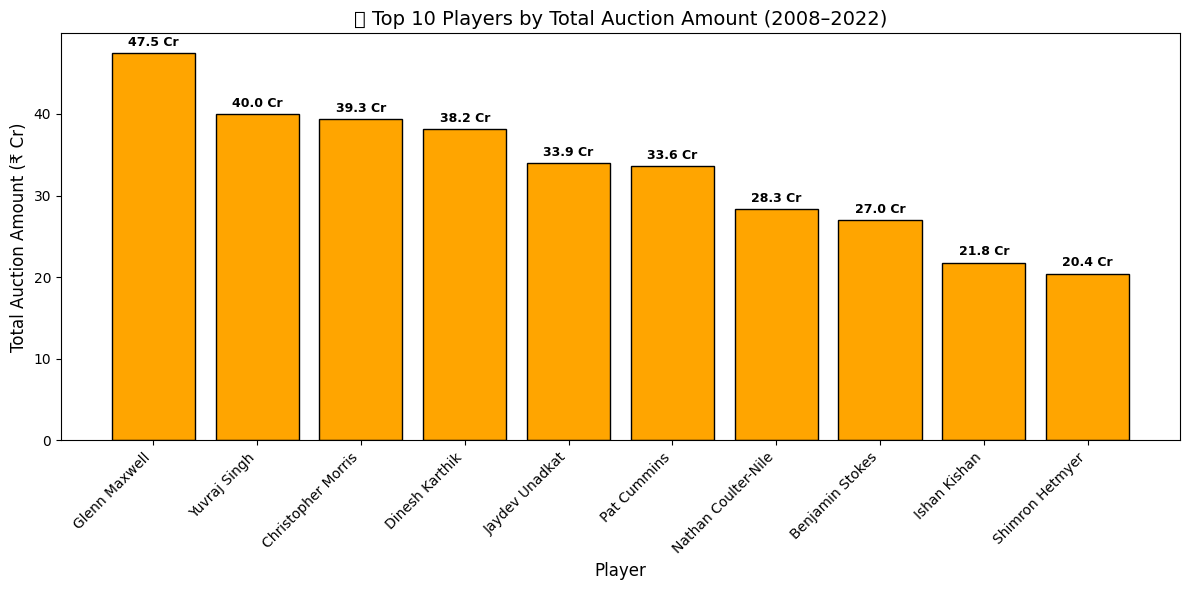

🏆 Top 10 Players (Overall Earnings in IPL Auctions 2008–2022):


,Player,Amount
164,Glenn Maxwell,47.5000
538,Yuvraj Singh,40.0000
111,Christopher Morris,39.3375
142,Dinesh Karthik,38.2000
204,Jaydev Unadkat,33.9375
348,Pat Cummins,33.6500
327,Nathan Coulter-Nile,28.3250
83,Benjamin Stokes,27.0000
182,Ishan Kishan,21.8000
457,Shimron Hetmyer,20.4500



🔥 Highest Single-Season Auction Buys (2008–2022):


,Year,Player,Amount
0,2013,Glenn Maxwell,7.50
1,2014,Yuvraj Singh,14.00
2,2015,Yuvraj Singh,16.00
3,2016,Shane Watson,9.50
4,2017,Benjamin Stokes,14.50
5,2018,Benjamin Stokes,12.50
6,2019,Jaydev Unadkat,8.40
7,2020,Pat Cummins,15.50
8,2021,Christopher Morris,16.25
9,2022,Ishan Kishan,15.25


In [11]:
# 📌 IPL Auction Analysis – Top Players & Yearly Highest Buys (2008–2022)

import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Load dataset
auction_data = pd.read_csv("IPLPlayerAuctionData.csv")

# 2️⃣ Clean column names
auction_data.columns = auction_data.columns.str.strip().str.title()

# 3️⃣ Convert Amount to numeric (₹ → Cr) and Year to integer safely
auction_data["Amount"] = pd.to_numeric(auction_data["Amount"], errors="coerce") / 1e7
auction_data["Year"] = pd.to_numeric(auction_data["Year"], errors="coerce")   # force numeric
auction_data = auction_data.dropna(subset=["Year"])                          # remove NaN years
auction_data["Year"] = auction_data["Year"].astype(int)                      # now safe to convert

# Total Auction Amount per Player (Career total)
player_totals = (
    auction_data.groupby("Player")["Amount"]
    .sum()
    .reset_index()
    .sort_values(by="Amount", ascending=False)
)

# Top 10 players overall
top_players = player_totals.head(10)

# Highest Single-Season Auction (Yearly Max)
yearly_max = auction_data.loc[auction_data.groupby("Year")["Amount"].idxmax()][
    ["Year", "Player", "Amount"]
].reset_index(drop=True)

# 6️⃣ Plot Top 10 players (career total)
plt.figure(figsize=(12,6))
bars = plt.bar(top_players["Player"], top_players["Amount"], color="orange", edgecolor="black")

# Add labels above bars (in Cr)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.1f} Cr", 
             ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.title("💰 Top 10 Players by Total Auction Amount (2008–2022)", fontsize=14)
plt.xlabel("Player", fontsize=12)
plt.ylabel("Total Auction Amount (₹ Cr)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 7️⃣ Show tables
print("🏆 Top 10 Players (Overall Earnings in IPL Auctions 2008–2022):")
display(top_players)

print("\n🔥 Highest Single-Season Auction Buys (2008–2022):")
display(yearly_max)
